In [81]:
import pandas as pd
import numpy as np
import DataPreprocessingLibrary as dpl
import string
# https://pypi.org/project/COVID19Py/

pd.set_option('display.max_colwidth', -1)


API_COLUMNS = ["Title", "Description", "NewsURL", "PublishedTime", "SourceName" , "SourceURL"]
# api_content = pd.read_csv("../Data/NewsContentClean.csv")
api_content = pd.read_csv("../Data/NewsContent.csv", index_col=[0])

In [82]:
from textblob import TextBlob
import nltk
from textblob import Word
from textblob.wordnet import VERB

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [84]:
temp1 = api_content.iloc[-2].Title
print("Showing the results of the original : \n" + str(temp1) + "\n================================================\n")
print("Showing the results of the preprocessed : \n" + str(dpl.preprocess(temp1) + "\n================================================\n"))

Showing the results of the original : 
US coronavirus: Saliva-based Covid-19 test could be a 'game changer'

Showing the results of the preprocessed : 
us virus  saliva based virus    test could be game changer 



In [85]:
api_content["Title"] = api_content['Title'].apply(dpl.preprocess)
api_content["Description"] = api_content['Description'].apply(dpl.preprocess)

# api_content = api_content.drop(["Title","Description"] , axis = 1) 
# api_content.to_csv("../Data/NewsContentPreprocessed.csv", index= False)

In [86]:
sentiment_value = []
sentiment_value_description = []

sentiment_value_nltk = []
sentiment_value_description_nltk = []

for title in api_content.Title.values:
    sentiment_value.append(  TextBlob( title ).sentiment.polarity  )
    sentiment_value_nltk.append(analyzer.polarity_scores(title)["compound"])
    
for description in api_content.Description.values:
    sentiment_value_description.append(  TextBlob( description ).sentiment.polarity  )
    sentiment_value_description_nltk.append(analyzer.polarity_scores(description)["compound"])
    

In [87]:
api_content["SentimentValueTitle"] = sentiment_value
api_content["SentimentValueDescription"] = sentiment_value_description

api_content["SentimentValueTitleVader"] = sentiment_value_nltk
api_content["SentimentValueDescriptionVader"] = sentiment_value_description_nltk



In [88]:
### General Sentiment value for the title is 0.03, pretty average but still more positive
### General Sentiment value for the description is 0.07, pretty average but still more positive

In [89]:
api_content['SentimentValueTitle'].describe()

count    1687.000000
mean     0.033244   
std      0.213618   
min     -1.000000   
25%      0.000000   
50%      0.000000   
75%      0.125000   
max      1.000000   
Name: SentimentValueTitle, dtype: float64

In [90]:
api_content['SentimentValueDescription'].describe()

count    1687.000000
mean     0.076789   
std      0.201190   
min     -1.000000   
25%      0.000000   
50%      0.040000   
75%      0.184754   
max      1.000000   
Name: SentimentValueDescription, dtype: float64

In [91]:
api_content['SentimentValueTitleVader'].describe()

count    1687.000000
mean    -0.104966   
std      0.370941   
min     -0.911800   
25%     -0.401900   
50%      0.000000   
75%      0.000000   
max      0.812600   
Name: SentimentValueTitleVader, dtype: float64

In [92]:
api_content['SentimentValueDescriptionVader'].describe()


count    1687.000000
mean    -0.006146   
std      0.458585   
min     -0.957800   
25%     -0.381800   
50%      0.000000   
75%      0.361200   
max      0.967400   
Name: SentimentValueDescriptionVader, dtype: float64

In [93]:
sentiment_values_df = api_content.copy()
sentiment_values_df_grouped = sentiment_values_df.groupby("PublishedTime").mean()

In [94]:
api_content.to_csv("../Data/NewsContentPreprocessed.csv")
sentiment_values_df_grouped.to_csv("../Data/SentimentValues.csv")

In [95]:
pd.set_option('display.max_colwidth', 30)

api_content

,Title,Description,NewsURL,PublishedTime,SourceName,SourceURL,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,white house doesn rule out...,the white house is not rul...,https://abcnews.go.com/Pol...,2020-01-29,ABC,https://abcnews.go.com,0.000000,0.258333,-0.4215,0.0000
1,virus crisis in china to h...,china controls almost ...,https://dfw.cbslocal.com/2...,2020-01-29,CBS Boston / WBZ,https://dfw.cbslocal.com,0.100000,0.300000,-0.6249,0.4215
2,virus cases in us should n...,a deadly virus that killed...,https://www.foxnews.com/he...,2020-01-29,Fox News,https://www.foxnews.com,0.500000,-0.040000,-0.3972,-0.8225
3,us learned from ebola but ...,the department of homelan...,https://www.usatoday.com/s...,2020-01-29,USA Today,https://www.usatoday.com,0.100000,0.000000,-0.2498,0.5859
4,virus japan and us fly ci...,japan and us airlift hundr...,https://www.theguardian.co...,2020-01-29,The Guardian,https://www.theguardian.com,0.800000,0.400000,-0.5994,-0.5994
...,...,...,...,...,...,...,...,...,...,...
1692,this is us to tackle vir...,creator dan fogelman revea...,https://www.msn.com/en-us/...,2020-08-16,Entertainment Tonight on M...,https://www.msn.com,0.000000,0.068182,0.0000,0.6124
1695,virus latest us military ...,new zealand postpones its ...,https://www.ft.com/content...,2020-08-16,The Financial Times,https://www.ft.com,0.200000,0.228788,0.0000,-0.3818
1696,us canada mexico border r...,u and mexico border will r...,https://www.usatoday.com/s...,2020-08-16,USA Today,https://www.usatoday.com,-0.300000,-0.200000,0.0000,0.0000
1697,us virus saliva based vir...,if cheap alternatives lik...,https://www.msn.com/en-us/...,2020-08-16,CNN on MSN.com,https://www.msn.com,-0.400000,0.200000,0.0000,0.3612


In [96]:
sentiment_values_df_grouped

,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
PublishedTime,,,,
2020-01-29,0.255208,0.153056,-0.438800,-0.069083
2020-01-30,0.022386,0.040869,0.058820,-0.249390
2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
2020-02-01,0.067340,0.135278,-0.117200,0.247789
2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...
2020-08-12,0.024858,0.063760,-0.104125,-0.467087
2020-08-13,-0.137500,-0.080238,-0.033287,-0.030875
2020-08-14,-0.042992,0.190265,-0.179600,-0.127713


In [97]:
# temp  = pd.read_csv("../Data/SentimentValues.csv", index_col=[0])
# temp  = pd.read_csv("../Data/NewsContentPreprocessed.csv", index_col=[0])
# # temp

In [98]:
showcase = pd.read_csv("../Data/NewsContent.csv", index_col=[0])
showcase["CleanTitle"] = showcase['Title'].apply(dpl.preprocess) 
showcase["CleanDescription"] = showcase['Description'].apply(dpl.preprocess) 
showcase = showcase.drop(["NewsURL" , "SourceName", "SourceURL"], axis = 1)
showcase

,Title,Description,PublishedTime,CleanTitle,CleanDescription
0,White House doesn't rule o...,The White House is not rul...,2020-01-29,white house doesn rule out...,the white house is not rul...
1,Coronavirus Crisis In Chin...,“China controls almost 100...,2020-01-29,virus crisis in china to h...,china controls almost ...
2,Coronavirus cases in US sh...,A deadly coronavirus that'...,2020-01-29,virus cases in us should n...,a deadly virus that killed...
3,US learned from Ebola but ...,“The Department of Homelan...,2020-01-29,us learned from ebola but ...,the department of homelan...
4,Coronavirus: Japan and US ...,Japan and US airlift hundr...,2020-01-29,virus japan and us fly ci...,japan and us airlift hundr...
...,...,...,...,...,...
1692,'This Is Us' to Tackle Cor...,Creator Dan Fogelman revea...,2020-08-16,this is us to tackle vir...,creator dan fogelman revea...
1695,Coronavirus latest: US mil...,New Zealand postpones its ...,2020-08-16,virus latest us military ...,new zealand postpones its ...
1696,"US-Canada, Mexico border r...",U.S. and Mexico border wil...,2020-08-16,us canada mexico border r...,u and mexico border will r...
1697,US coronavirus: Saliva-bas...,"""If cheap alternatives lik...",2020-08-16,us virus saliva based vir...,if cheap alternatives lik...


In [99]:
temp = showcase.copy()
temp = temp.drop(["PublishedTime", "Description"], axis =1 )

In [100]:
pd.set_option('display.max_colwidth', -1)
temp.iloc[-5]

Title               'This Is Us' to Tackle Coronavirus in Season 5                                                                                                                                                
CleanTitle           this is us  to tackle virus in season                                                                                                                                                        
CleanDescription    creator dan fogelman revealed the news on sunday when fan inquired about whether the new season would include virus in its present day storylines   yes on virus  sic    fogelman wrote on    
Name: 1692, dtype: object

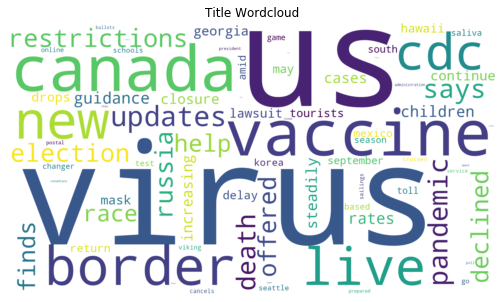

In [101]:
dpl.make_word_cloud(showcase[-30:] , "CleanTitle", "Title Wordcloud")


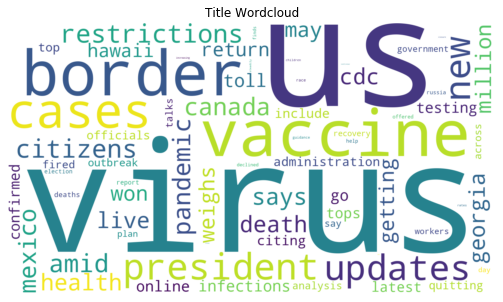

In [102]:
dpl.make_word_cloud(showcase[-60:] , "CleanTitle", "Title Wordcloud")


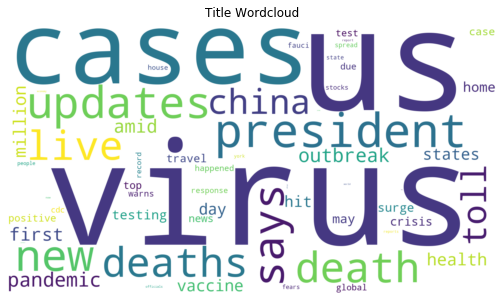

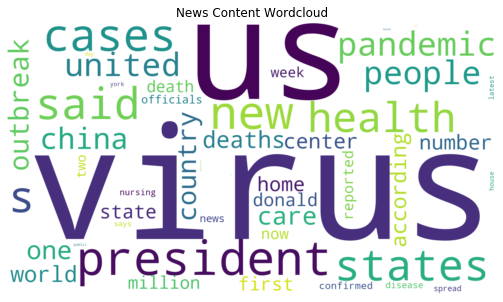

In [103]:

dpl.make_word_cloud(showcase , "CleanTitle", "Title Wordcloud")
dpl.make_word_cloud(showcase, "CleanDescription", "News Content Wordcloud")